# <font color="#8333ff">TP : Pratiquez la régression linéaire sur le jeu de données des arbres</font>

In [173]:
# Chargement du jeu de données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from functions import *

In [30]:
arbres = pd.read_csv('les-arbres.csv', sep=";", decimal=',')
# On importe le fichier les-arbres.csv, qui contient 204496 données et 17 
# variables.
# les variables
# circ : circonférence de l'arbre (en cm )
# haut : hauteur de l'arbre (en m )

In [31]:
arbres.shape

(204496, 17)

## Visualisez le jeu de données

Visualisons l'ensemble des données avec cette commande.

In [32]:
arbres.head()

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,127345,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,JARDIN YACINE KATEB / 18 RUE WATTEAU,000202001,Cèdre,Cedrus,libani subsp. atlantica,NaN,150,0,NaN,NON,"48.8341793147,2.35650206299"
1,131784,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,00040162,Erable,Acer,platanoides,NaN,100,0,NaN,NaN,"48.8283552043,2.26994265954"
2,248995,Arbre,Alignement,PARIS 20E ARRDT,12,NaN,RUE ERNEST LEFEVRE,000202020,Platane,Platanus,x hispanica,NaN,70,15,A,NON,"48.8696813117,2.4028852764"
3,261207,Arbre,Alignement,PARIS 8E ARRDT,75,NaN,BOULEVARD MALESHERBES,001501007,Platane,Platanus,x hispanica,NaN,50,10,A,NON,"48.8771247785,2.31689028967"
4,261265,Arbre,Alignement,PARIS 17E ARRDT,NaN,NaN,AVENUE DE LA PORTE D ASNIERES,000301002,Platane,Platanus,x hispanica,NaN,135,17,A,NaN,"48.8907087058,2.30279379092"


In [33]:
arbres.columns

Index(['IDBASE', 'TYPE EMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENT ADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLE FRANCAIS', 'GENRE', 'ESPECE', 'VARIETE OUCULTIVAR',
       'CIRCONFERENCE (cm)', 'HAUTEUR (m)', 'STADE DE DEVELOPPEMENT',
       'REMARQUABLE', 'geo_point_2d'],
      dtype='object')

In [91]:
data=arbres.iloc[0:139,-5:-3]

In [96]:
mask = data['HAUTEUR (m)']<=200

In [98]:
data = data[mask]

In [99]:
data.describe()

,CIRCONFERENCE (cm),HAUTEUR (m)
count,138.000000,138.000000
mean,76.608696,8.442029
std,49.338609,5.047248
min,0.000000,0.000000
25%,35.000000,5.000000
50%,78.000000,9.000000
75%,108.750000,12.000000
max,210.000000,20.000000


On peut représenter graphiquement le nuage de points hauteur(y=HAUTEUR (m)) en fonction de la circonférence (x=CIRCONFERENCE (cm)):

In [102]:
circ = data['CIRCONFERENCE (cm)']
circ.describe()

count    138.000000
mean      76.608696
std       49.338609
min        0.000000
25%       35.000000
50%       78.000000
75%      108.750000
max      210.000000
Name: CIRCONFERENCE (cm), dtype: float64

In [182]:
haut = data['HAUTEUR (m)']
haut.describe()

count    138.000000
mean       8.442029
std        5.047248
min        0.000000
25%        5.000000
50%        9.000000
75%       12.000000
max       20.000000
Name: HAUTEUR (m), dtype: float64

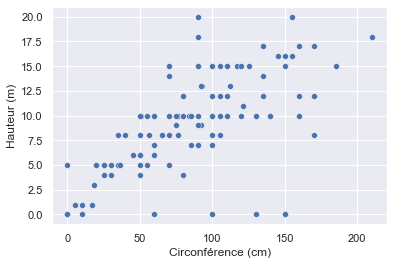

In [104]:
sns.set()

ax = sns.scatterplot(x=circ, y=haut, data=arbres)
ax.set(xlabel='Circonférence (cm)', ylabel='Hauteur (m)')
# ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()

*Ce nuage de points nous fait penser à un alignement selon une forme qui n'est pas très loin d'une droite.*

## Réalisez une régression linéaire simple

Essayons de lancer une régression linéaire simple sur ce nuage de points :

In [122]:
reg_simp = smf.ols('haut ~ circ', data=data).fit()

Voici les résultats en sortie de cette commande :

In [108]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                   haut   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     134.7
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           4.51e-22
Time:                        15:41:40   Log-Likelihood:                -371.22
No. Observations:                 138   AIC:                             746.4
Df Residuals:                     136   BIC:                             752.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9138      0.566      5.148      0.0

- On constate que le coefficient de détermination vaut environ 0.5, ce qui n’est pas très élevé.
- On rejette la nullité des paramètres au niveau de test 5%.

*Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0.
Ici, on voit que la variable T12 est significative.*

## Visualisez la droite de régression

Alors, voyons à quoi ressemble notre droite.

In [111]:
data

,CIRCONFERENCE (cm),HAUTEUR (m)
0,150,0
1,100,0
2,70,15
3,50,10
4,135,17
...,...,...
134,55,5
135,20,5
136,60,10
137,65,8


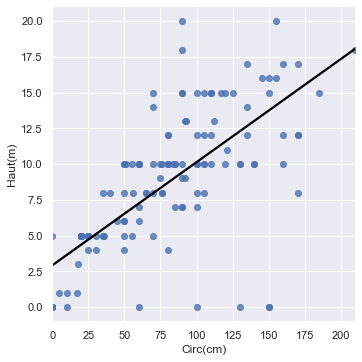

In [112]:
ax = sns.lmplot(x="CIRCONFERENCE (cm)", y="HAUTEUR (m)", data=data, ci=None, line_kws={'color':'black'})
ax.set(xlabel='Circ(cm)', ylabel='Haut(m)')
plt.show()

On peut également représenter les valeurs ajustées en fonction des valeurs observées :

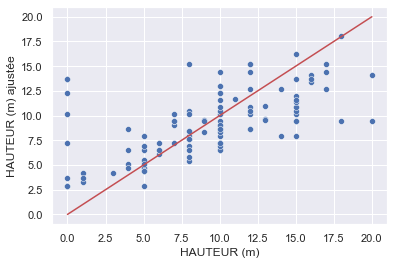

In [114]:
data['haut_ajust'] = reg_simp.predict() # prédictions

X_plot = [haut.min(), haut.max()]

ax = sns.scatterplot(x="HAUTEUR (m)", y="haut_ajust", data=data)
ax.set(xlabel='HAUTEUR (m)', ylabel='HAUTEUR (m) ajustée')
plt.plot(X_plot, X_plot, color='r')
plt.show()

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait,
les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation $y=x$, soit la première bissectrice.

## Représentez les résidus du modèle

On peut obtenir les résidus du modèle à l'aide de cette commande :

In [115]:
data['residu_s'] = reg_simp.resid

À partir de ceux-ci, on peut représenter l'histogramme de ces résidus.

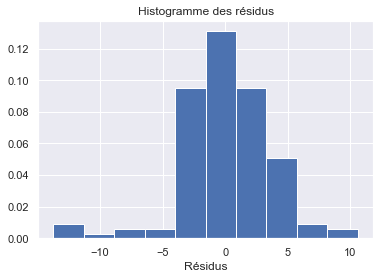

In [117]:
plt.hist(data['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'allure de l'histogramme est assez classique : centrée et à peu près symétrique.

## Prévoyez la concentration d'ozone

Prévoyons maintenant la concentration en ozone d'une journée. Sachant que la température prévue de cette journée est de 19 °C, on peut utiliser notre modèle de régression à des fins de prévision !

In [123]:
a_prevoir = pd.DataFrame({'circ':[66]})
haut_prev = reg_simp.predict(a_prevoir)
print(round(haut_prev[0], 2))

7.68


On obtient une hauteur de 7.68m pour 66 cm de circonférence.

# <font color="#8333ff">TP : Pratiquez la régression linéaire multiple sur le jeu de données de l'ozone</font>

In [125]:
data

,CIRCONFERENCE (cm),HAUTEUR (m),haut_ajust,residu_s
0,150,0,13.738076,-13.738076
1,100,0,10.129987,-10.129987
2,70,15,7.965134,7.034866
3,50,10,6.521898,3.478102
4,135,17,12.655649,4.344351
...,...,...,...,...
134,55,5,6.882707,-1.882707
135,20,5,4.357045,0.642955
136,60,10,7.243516,2.756484
137,65,8,7.604325,0.395675


In [131]:
data['circ_sqrt'] = np.sqrt(data['CIRCONFERENCE (cm)'])
data

,CIRCONFERENCE (cm),HAUTEUR (m),haut_ajust,residu_s,circ_sqrt
0,150,0,13.738076,-13.738076,12.247449
1,100,0,10.129987,-10.129987,10.000000
2,70,15,7.965134,7.034866,8.366600
3,50,10,6.521898,3.478102,7.071068
4,135,17,12.655649,4.344351,11.618950
...,...,...,...,...,...
134,55,5,6.882707,-1.882707,7.416198
135,20,5,4.357045,0.642955,4.472136
136,60,10,7.243516,2.756484,7.745967
137,65,8,7.604325,0.395675,8.062258


In [134]:
# régression linéaire mutliple n°1
reg_multi = smf.ols('haut~circ+circ_sqrt', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   haut   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     83.32
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.70e-24
Time:                        17:25:31   Log-Likelihood:                -363.24
No. Observations:                 138   AIC:                             732.5
Df Residuals:                     135   BIC:                             741.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1252      0.920     -0.136      0.8

In [ ]:
# variable circ non significative : p_value = 0.876 n'est pas inférieure à 0.05
# on la rejette
# varible circ_sqrt p_value 0 < 0.05 donc significative

In [135]:
# régression linéaire mutliple n°2 sans circ
reg_multi = smf.ols('haut~circ_sqrt', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   haut   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     167.8
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.67e-25
Time:                        17:29:09   Log-Likelihood:                -363.25
No. Observations:                 138   AIC:                             730.5
Df Residuals:                     136   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0355      0.715     -0.050      0.9

In [138]:
# prévision
a_prevoir_2 = pd.DataFrame({'circ_sqrt': 10}, index=[0])
haut_prev_2 = reg_multi.predict(a_prevoir_2)
print(round(haut_prev_2[0], 2))

10.55


In [139]:
# analyse des résultats
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   haut   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     167.8
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.67e-25
Time:                        17:34:18   Log-Likelihood:                -363.25
No. Observations:                 138   AIC:                             730.5
Df Residuals:                     136   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0355      0.715     -0.050      0.9

In [155]:
alpha = 0.05

In [140]:
n = data.shape[0]
p = 2

In [141]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

Calculez les leviers
On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de  2∗𝑝𝑛 .

In [143]:
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

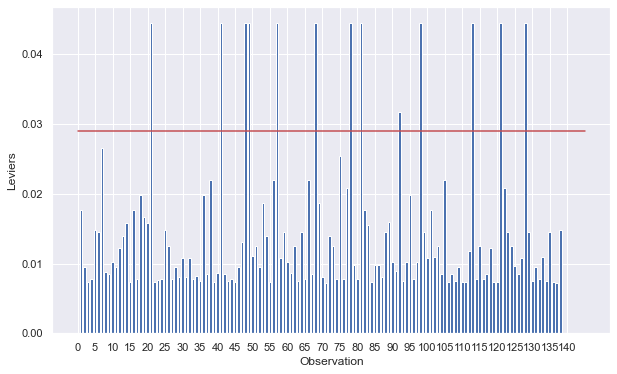

In [149]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 145, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 145], [seuil_levier, seuil_levier], color='r')
plt.show()

Pour sélectionner les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [150]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
20,21,0.044527
40,41,0.044527
47,48,0.044527
48,49,0.044527
56,57,0.044527
67,68,0.044527
77,78,0.044527
80,81,0.044527
91,92,0.031671
97,98,0.044527


## Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [156]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

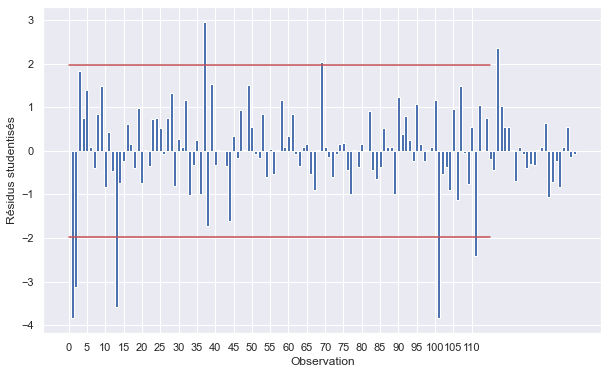

In [157]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

## Déterminez la distance de Cook

Pour trouver la distance de Cook, nous exécutons ceci :

In [159]:
influence = reg_multi.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [160]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter les observations influentes comme ceci :

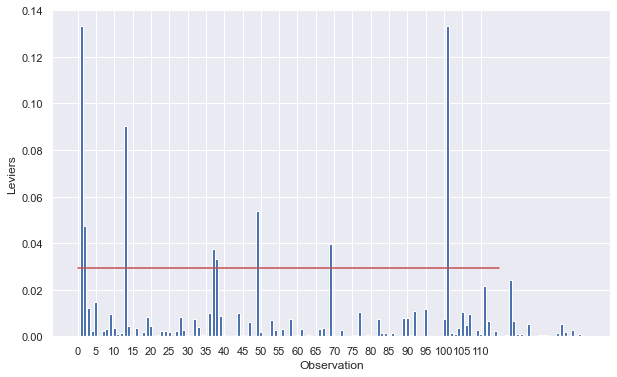

In [161]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 115], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On ne retire des points qu'après avoir vérifié qu'ils sont effectivement atypiques, voire aberrants, au vu du modèle estimé.

## Vérifier la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [162]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0]

Ici, le coefficient est inférieur à 10, il n'y a donc pas de problème de colinéarité.

## Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [163]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0023076474626058828


La p-valeur ici est inférieure à  5 %, on rejette l'hypothèse  𝐻0  selon 
laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

## Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [166]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9073529839515686, pvalue=9.653316368485321e-08)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0.003 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.

Nous aurions pu aussi sélectionner automatiquement un modèle avec l'ensemble des variables à disposition (variable circ_sqrt) :

In [185]:
columns = ['circ_sqrt']
reg_backward = backward_selected(data[columns], 'haut')

_______________________________
haut ~ circ_sqrt + 1


PatsyError: Error evaluating factor: NameError: name 'haut' is not defined
    haut ~ circ_sqrt + 1
    ^^^^

In [168]:
data

,CIRCONFERENCE (cm),HAUTEUR (m),haut_ajust,residu_s,circ_sqrt
0,150,0,13.738076,-13.738076,12.247449
1,100,0,10.129987,-10.129987,10.000000
2,70,15,7.965134,7.034866,8.366600
3,50,10,6.521898,3.478102,7.071068
4,135,17,12.655649,4.344351,11.618950
...,...,...,...,...,...
134,55,5,6.882707,-1.882707,7.416198
135,20,5,4.357045,0.642955,4.472136
136,60,10,7.243516,2.756484,7.745967
137,65,8,7.604325,0.395675,8.062258
